In [2]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [3]:
#hide
from fastbook import *
from fastai.vision.widgets import *

In [4]:
key = os.environ.get('AZURE_SEARCH_KEY', '74891db298d44fa5addb53c906f42474')

In [5]:
results = search_images_bing(key, 'alligator')
ims = results.attrgot('contentUrl')
len(ims)

150

In [6]:
# looking at one image
dest = 'images/alligator'
download_url(ims[0], dest)


Path('images/alligator')

In [7]:
im = Image.open(dest)

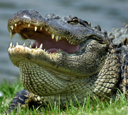

In [8]:
im.to_thumb(128,128)

In [9]:
categories = 'alligator','crocodile'
path = Path('gatorguesser')


In [10]:
download_images

<function fastai.vision.utils.download_images(dest, url_file=None, urls=None, max_pics=1000, n_workers=8, timeout=4, preserve_filename=False)>

In [11]:
if not path.exists():
    path.mkdir()
    for option in categories:
        dest = (path/option)
        results = search_images_bing(key, f'{option}')
        download_images(dest, urls=results.attrgot('contentUrl'))

In [12]:
paths = get_image_files(path)
paths

(#282) [Path('gatorguesser/alligator/26e28a47-a665-40fe-9fa7-8a8987996506.JPG'),Path('gatorguesser/alligator/fe030a15-7b33-4a7e-a98f-9a8183cd5757.jpg'),Path('gatorguesser/alligator/60d70cc4-faf4-4346-941b-7edef99cc9d8.jpg'),Path('gatorguesser/alligator/1a8518d9-8951-4a31-a90c-16882b98a990.jpg'),Path('gatorguesser/alligator/48629264-a9b1-40c4-8dad-127fa6bb9070.jpg'),Path('gatorguesser/alligator/54ebf903-c66d-43ff-93fa-052460ecc6c9.jpg'),Path('gatorguesser/alligator/5671be42-46e0-41d1-b175-85f5383ca399.JPG'),Path('gatorguesser/alligator/f09472c2-89a0-4d06-8e54-5f4422b6cca0.jpg'),Path('gatorguesser/alligator/589ec674-7ba8-45ff-9ab3-f33b9e62bf7b.jpg'),Path('gatorguesser/alligator/730a7fe4-5e63-4062-a449-4c5e6da89645.jpg')...]

In [13]:
failed = verify_images(paths)
failed

(#0) []

In [14]:
failed.map(Path.unlink)

(#0) []

In [15]:
gators = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [16]:
dls = gators.dataloaders(path)

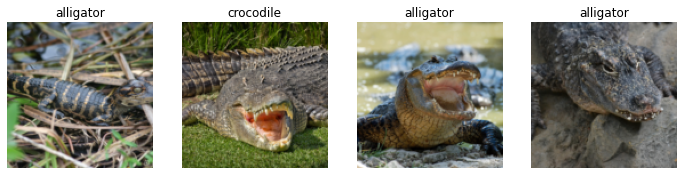

In [17]:
dls.valid.show_batch(max_n=4, nrows=1)

In [18]:
gators = gators.new(
    item_tfms = RandomResizedCrop(224, min_scale = 0.5),
    batch_tfms = aug_transforms())
dls = gators.dataloaders(path)

In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.459271,3.471065,0.607143,00:11


epoch,train_loss,valid_loss,error_rate,time
0,0.782909,1.606873,0.535714,00:12
1,0.667072,0.765602,0.339286,00:12
2,0.620141,0.607818,0.250000,00:11
3,0.543644,0.500698,0.178571,00:12


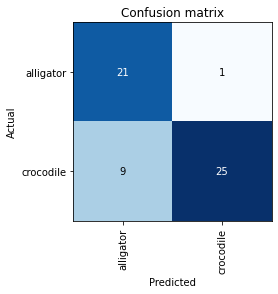

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [22]:
learn.export()

In [23]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [24]:
learn_inf = load_learner(path/'export.pkl')

In [25]:
learn_inf.predict('images/alligator')

('alligator', TensorBase(0), TensorBase([0.9861, 0.0139]))

In [26]:
learn_inf.dls.vocab

['alligator', 'crocodile']

In [27]:
btn_upload = widgets.FileUpload()

FileUpload(value={}, description='Upload')

In [28]:
btn_upload = SimpleNamespace(data = ['images/alligator'])

In [29]:
img = PILImage.create(btn_upload.data[-1])

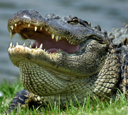

Output()

In [30]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

In [31]:
pred,pred_idx,probs = learn_inf.predict(img)

In [32]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: alligator; Probability: 0.9861')

In [33]:
btn_run = widgets.Button(description='Classify')

Button(description='Classify', style=ButtonStyle())

In [34]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [39]:
btn_upload = widgets.FileUpload()
VBox([widgets.Label('Gator Guesser!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

In [40]:
!pip install voila
!jupyter serverextension enable --sys-prefix voila

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 18.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.3/111.3 kB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 kB 14.7 MB/s eta 0:00:00
  Attempting uninstall: nbclient
    Found existing installation: nbclient 0.6.4
    Uninstalling nbclient-0.6.4:
      Successfully uninstalled nbclient-0.6.4
Enabling: voila
- Writing config: /root/mambaforge/etc/jupyter
    - Validating...
      voila 0.3.5 OK
